In [1]:
import numpy as np
import matplotlib.pyplot as plt

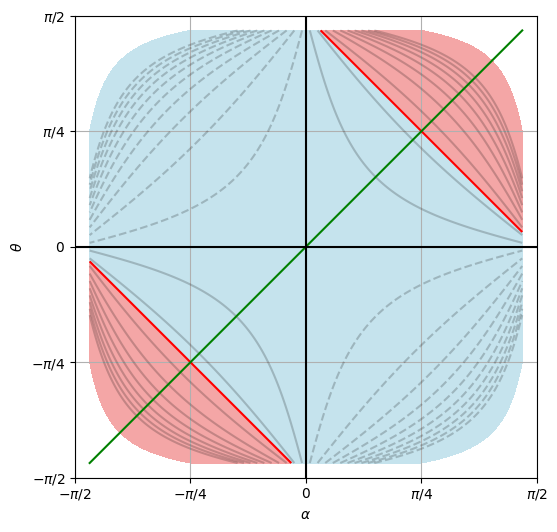

<Figure size 640x480 with 0 Axes>

In [2]:
# Flip and Pseudoflip Regimes
def f(alpha, theta):
    return np.tan(alpha) * np.tan(theta)

# Define the grid, avoiding the asymptotes of tan(x) and tan(y)
x = np.linspace(-np.pi/2 + 0.1, np.pi/2 - 0.1, 400)
y = np.linspace(-np.pi/2 + 0.1, np.pi/2 - 0.1, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create the contour plot
plt.figure(figsize=(8, 6))
# Contour lines
contours = plt.contour(X, Y, Z, levels=np.linspace(-5,5,20),colors='black',alpha=0.2)
limits = plt.contour(X, Y, Z, levels=[1],colors='red',alpha=1)
# Fill the regions
plt.contourf(X, Y, Z, levels=[-10, 1], colors='lightblue', alpha=0.7)
plt.contourf(X, Y, Z, levels=[1, 10], colors='lightcoral', alpha=0.7)
#Plot upright condition line
plt.plot(x,x,color='green')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')

# Define ticks and labels manually
xticks = np.arange(-np.pi/2, np.pi/2 + 0.1, np.pi/4)
yticks = np.arange(-np.pi/2, np.pi/2 + 0.1, np.pi/4)

xtick_labels = [r"$-\pi/2$", r"$-\pi/4$", r"$0$", r"$\pi/4$", r"$\pi/2$"]
ytick_labels = xtick_labels  # same in this case

plt.xticks(xticks, xtick_labels)
plt.yticks(yticks, ytick_labels)

# Add colorbar and labels
#plt.colorbar(label='f(x, y) = tan(x) * tan(y)')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\theta$')
plt.grid(True)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()
plt.savefig('alpha-theta-contours.png',format='png')

In [3]:
def flip_angle(alpha,theta,Dphi,Dpsi): #Dgamma
    return (Dphi + Dpsi*np.sin(theta))*np.cos(alpha) - Dpsi/Dphi*np.sin(Dphi)*np.cos(theta)*np.sin(alpha)*np.sin(Dphi)

def twist_angle(theta,Dphi,Dpsi): #Ddelta
    return Dphi*np.sin(theta) + Dpsi

def flatspin_angle(alpha,theta,Dphi,Dpsi):
    return (Dphi + Dpsi*np.sin(theta))*np.sin(alpha) + Dpsi/Dphi*np.cos(theta)*np.cos(alpha)*np.sin(Dphi)

At alpha=45°, the precession and spin angle set ($\Delta\phi,\Delta\psi$)=(1.0,1.0) correspond to the flip and twist angle set ($\Delta\gamma,\Delta\delta$)=(1.21,1.71)
At alpha=45°, the precession and spin angle set ($\Delta\phi,\Delta\psi$)=(1.0,1.5) correspond to the flip and twist angle set ($\Delta\gamma,\Delta\delta$)=(1.46,2.21)
At alpha=45°, the precession and spin angle set ($\Delta\phi,\Delta\psi$)=(1.0,2.0) correspond to the flip and twist angle set ($\Delta\gamma,\Delta\delta$)=(1.71,2.71)


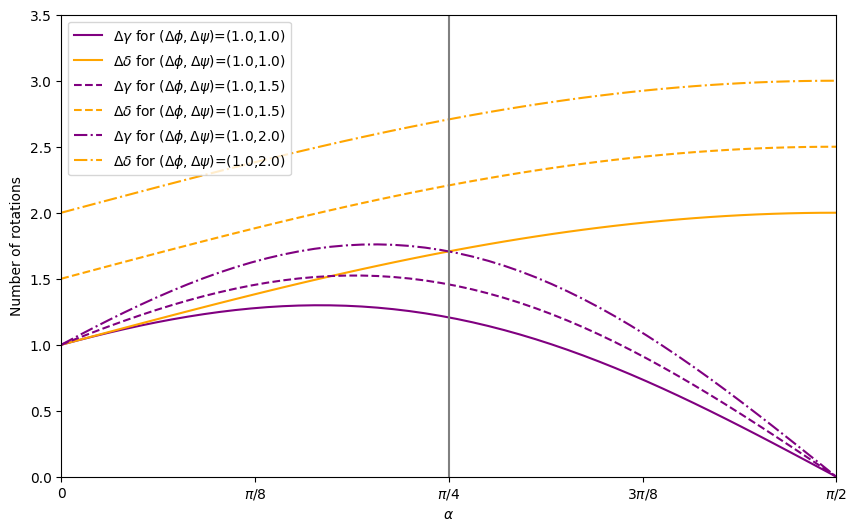

In [16]:
Dphis = 2*np.pi*np.array([1,1,1])
Dpsis = 2*np.pi*np.array([1,1.5,2])
lines = ['-','--','-.']
theta = 2*np.pi*np.linspace(0,1/4) #1/4 rot = 90° = pi/2
alpha = theta #upright condition
fig = plt.figure(figsize=(10,6))
for i in range(len(Dphis)):
    Dgamma = flip_angle(alpha,theta,Dphis[i],Dpsis[i])
    Ddelta = twist_angle(theta,Dphis[i],Dpsis[i])
    plt.plot(theta/(2*np.pi),Dgamma/(2*np.pi),linestyle=lines[i],color='purple'
             ,label='$\Delta\gamma$ for ($\Delta\phi,\Delta\psi$)=('+str(Dphis[i]/(2*np.pi))+','+str(Dpsis[i]/(2*np.pi))+')')
    plt.plot(theta/(2*np.pi),Ddelta/(2*np.pi),linestyle=lines[i],color='orange'
             ,label='$\Delta\delta$ for ($\Delta\phi,\Delta\psi$)=('+str(Dphis[i]/(2*np.pi))+','+str(Dpsis[i]/(2*np.pi))+')')
    Dgamma45 = flip_angle(np.pi/4,np.pi/4,Dphis[i],Dpsis[i])
    Ddelta45 = twist_angle(np.pi/4,Dphis[i],Dpsis[i])
    print('At alpha=45°, the precession and spin angle set ($\Delta\phi,\Delta\psi$)=('+str(Dphis[i]/(2*np.pi))+','+str(Dpsis[i]/(2*np.pi))+') correspond to the flip and twist angle set ($\Delta\gamma,\Delta\delta$)=('+str(np.round(Dgamma45/(2*np.pi),2))+','+str(np.round(Ddelta45/(2*np.pi),2))+')')
plt.axvline(x=1/8,color='grey') #1/8 rot = 45° = pi/4
plt.xticks([0,1/16,1/8,3/16,1/4],['0','$\pi/8$','$\pi/4$','$3\pi/8$','$\pi/2$'])
plt.xlabel(r'$\alpha$')
plt.ylabel('Number of rotations')
plt.xlim(0,1/4)
plt.ylim(0,3.5)
plt.legend(loc='upper left')#,bbox_to_anchor=(0.1,1))
plt.savefig('flip-twist-mixing.png',format='png',bbox_inches='tight')

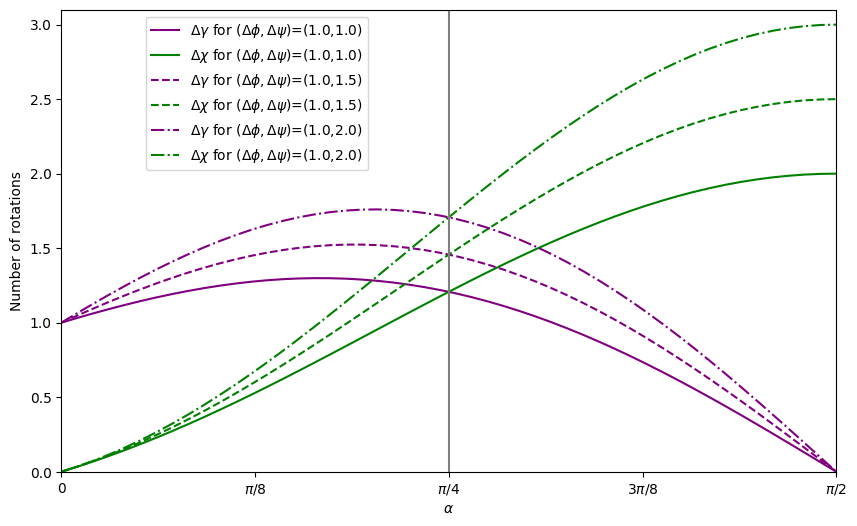

In [15]:
Dphis = 2*np.pi*np.array([1,1,1])
Dpsis = 2*np.pi*np.array([1,1.5,2])
lines = ['-','--','-.']
theta = 2*np.pi*np.linspace(0,1/4) #1/4 rot = 90° = pi/2
alpha = theta #upright condition
fig = plt.figure(figsize=(10,6))
for i in range(len(Dphis)):
    plt.plot(theta/(2*np.pi),flip_angle(alpha,theta,Dphis[i],Dpsis[i])/(2*np.pi),linestyle=lines[i],color='purple'
             ,label='$\Delta\gamma$ for ($\Delta\phi,\Delta\psi$)=('+str(Dphis[i]/(2*np.pi))+','+str(Dpsis[i]/(2*np.pi))+')')
    plt.plot(theta/(2*np.pi),flatspin_angle(alpha,theta,Dphis[i],Dpsis[i])/(2*np.pi),linestyle=lines[i],color='green'
             ,label='$\Delta\chi$ for ($\Delta\phi,\Delta\psi$)=('+str(Dphis[i]/(2*np.pi))+','+str(Dpsis[i]/(2*np.pi))+')')
plt.axvline(x=1/8,color='grey') #1/8 rot = 45° = pi/4
plt.xticks([0,1/16,1/8,3/16,1/4],['0','$\pi/8$','$\pi/4$','$3\pi/8$','$\pi/2$'])
plt.xlabel(r'$\alpha$')
plt.ylabel('Number of rotations')
plt.xlim(0,1/4)
plt.ylim(0,3.1)
plt.legend(loc='upper left',bbox_to_anchor=(0.1,1))
plt.savefig('flip-flatspin-mixing.png',format='png',bbox_inches='tight')

7.247844507162112
Dpsi 1.0
theta: 5.598737816228598
flip: 1.092325115216707
twist: 1.097560975609756
Dpsi 2.0
theta: 11.251847729275962
flip: 1.3635220083097404
twist: 2.195121951219512
Dpsi 3.0
theta: 17.018647403554976
flip: 1.7958081800848007
twist: 3.2926829268292686
5.548068590848296
Dpsi 1.0
theta: 7.322318933246443
flip: 1.118256471903555
twist: 1.1274509803921569
Dpsi 2.0
theta: 14.767775946529381
flip: 1.4599304213106072
twist: 2.2549019607843137
Dpsi 3.0
theta: 22.479505609404
flip: 1.9839174728123972
twist: 3.3823529411764706
4.792612628042155
Dpsi 1.0
theta: 8.484449741376299
flip: 1.1349822295403225
twist: 1.1475409836065573
Dpsi 2.0
theta: 17.162452548121863
flip: 1.5193570230874358
twist: 2.2950819672131146
Dpsi 3.0
theta: 26.271355852992205
flip: 2.0874182155626797
twist: 3.442622950819672


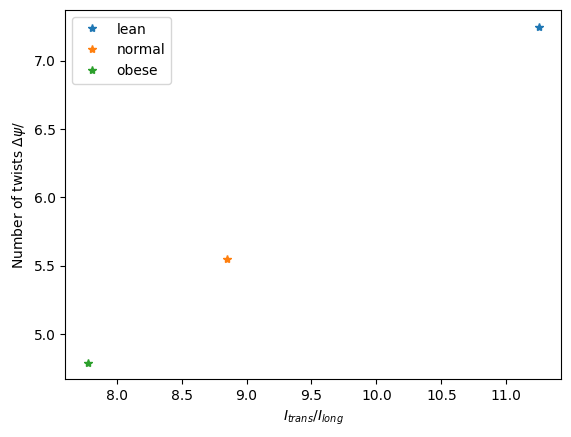

In [19]:
#Under which conditions is |theta|<45°, i.e. head would stay above hips for ideal tricking where alpha=45°?
'''
m_ = [55,75,90,120]
h_ = [1.60,1.80,2.00,1.80]
p_ = [0.80,0.90,0.85,1.10]

def I(m,h,p):
    r = p/(2*np.pi)
    I_trans = 1/12*m*(3*r**2+h**2)
    I_long = m*r**2/2
    return I_trans, I_long
'''

I_trans = [9,11.5,14.0]
I_long = [0.8,1.3,1.8]
labels = ['lean','normal','obese']

def psi_limit(Dphi,I_ratio):
    return Dphi/np.sqrt(2)*(I_ratio-1) #I_ratio = I_trans/I_long
    #return Dphi/2*(I_ratio-1) #I_ratio = I_trans/I_long

def theta(Dphi,Dpsi,I_ratio):
    return np.arcsin(1/(I_ratio-1)*Dpsi/Dphi)

Dphi = 2*np.pi
Dpsis = 2*np.pi*np.array([1,2,3])
for i in range(len(I_trans)):
    plt.plot(I_trans[i]/I_long[i],psi_limit(Dphi,I_trans[i]/I_long[i])/(2*np.pi),'*',label=labels[i])
    print(psi_limit(Dphi,I_trans[i]/I_long[i])/(2*np.pi))
    for j in range(3):
        print('Dpsi',Dpsis[j]/(2*np.pi))
        th = theta(Dphi,Dpsis[j],I_trans[i]/I_long[i])
        print('theta:',th*360/(2*np.pi))
        print('flip:',flip_angle(th,th,Dphi,Dpsis[j])/(2*np.pi))
        print('twist:',twist_angle(th,Dphi,Dpsis[j])/(2*np.pi))
plt.xlabel(r'$I_{trans}/I_{long}$')
plt.ylabel(r'Number of twists $\Delta \psi/$')
plt.legend()